In [1]:
from simulator.Noise_simulator import Operation,DiagonalGate,PauliNoise,Circuit,sample_noisy_IQP_once_streaming_final
from typing import List
import numpy as np


In [52]:
data = np.load(f"simulation_results_0.03_error_0.01/all_results.npy",allow_pickle=True)

In [ ]:
data = np.reshape(data, (-1, data.shape[-1]))

In [57]:
np.save("simulation_results_0.03_error_0.01_all_results.npy", data)

Error loading result_9.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_9.npy'
Error loading result_10.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_10.npy'
Error loading result_11.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_11.npy'
Error loading result_12.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_12.npy'
Error loading result_13.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_13.npy'
Error loading result_14.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_14.npy'
Error loading result_15.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_15.npy'
Error loading result_16.npy: [Errno 2] No such file or directory: 'simulation_results_0.05_error_0.01/result_16.npy'
Error loading result_17.npy: [Errno 2] No such file or directory: 

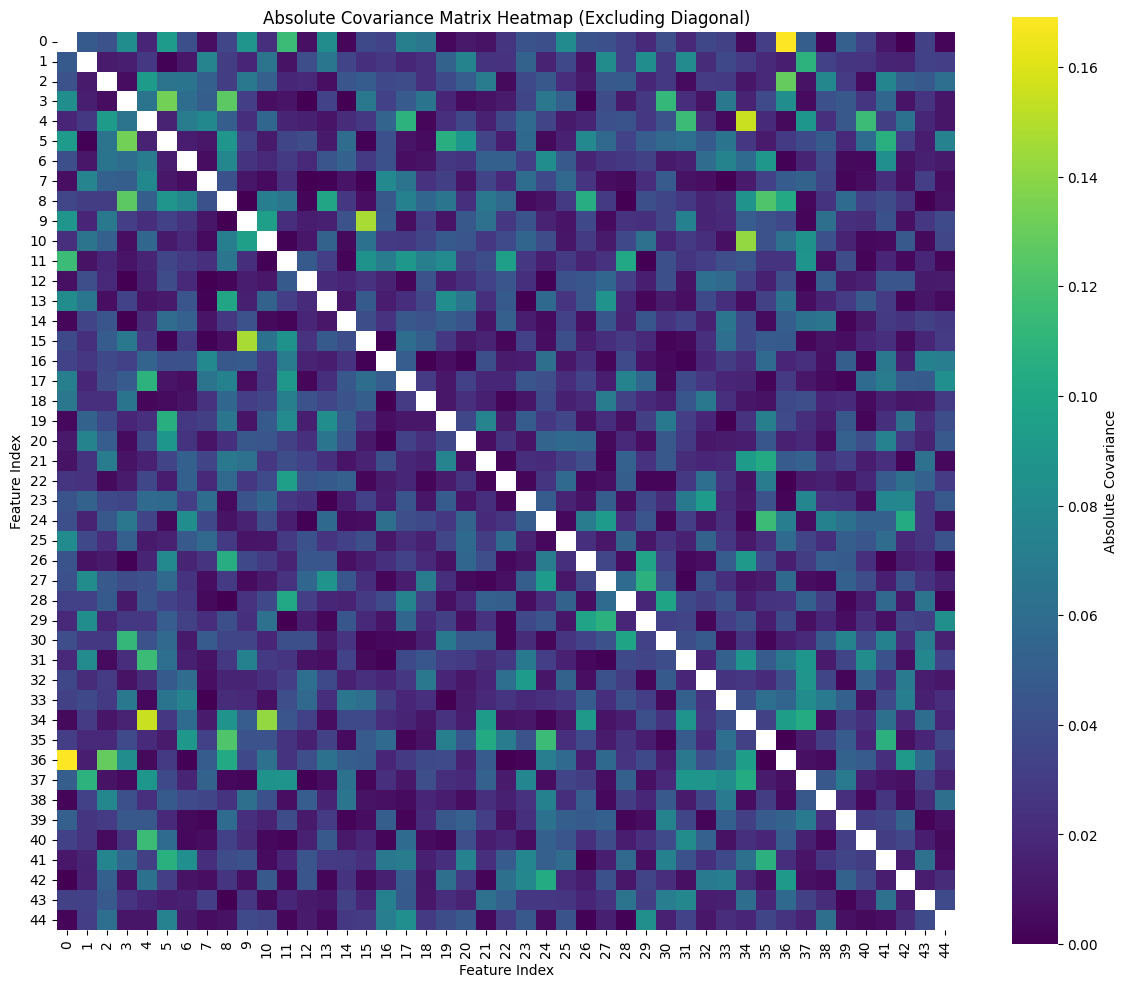

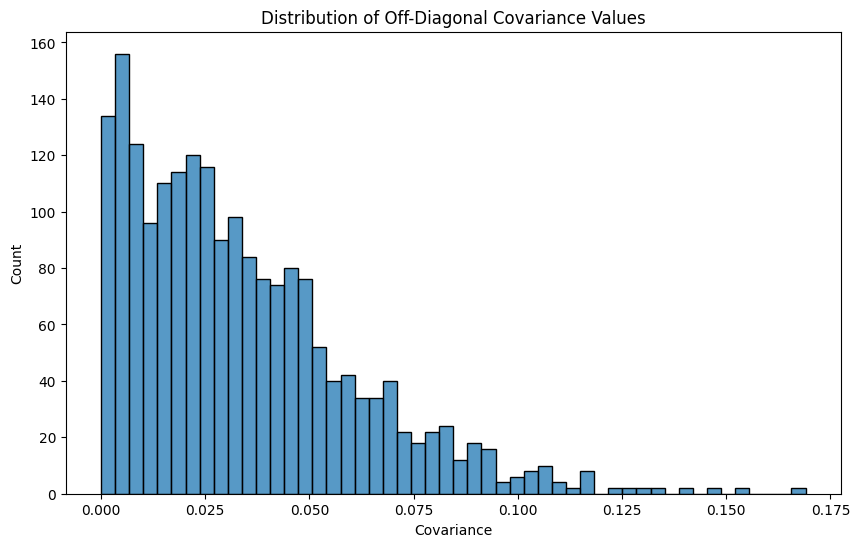

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare data
res = None
for i in range(1,100):
    try:
        sample = np.load(f"simulation_results_0.05_error_0.01/result_{i}.npy",allow_pickle=True)
        if res is None:
            res = sample
        else:
            res = np.concatenate((res, sample), axis=0)
    except Exception as e:
        print(f"Error loading result_{i}.npy: {e}")
data_2 = np.array(res)
data_2 = np.reshape(data_2, (-1,45))
data_2 = data_2.astype(np.float64)
#data_2 = np.flip(data_2,axis=1)
data_2 = data_2*2-1
data_2 = data_2.T
matrix = abs(np.cov(data_2))


# Mask diagonal elements
mask = np.eye(matrix.shape[0], dtype=bool)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix, 
            mask=mask,  # Add mask to hide diagonal
            cmap='viridis',
            square=True,
            annot=False,
            fmt='.2f',
            cbar_kws={'label': 'Absolute Covariance'})
plt.title('Absolute Covariance Matrix Heatmap (Excluding Diagonal)')
plt.xlabel('Feature Index') 
plt.ylabel('Feature Index')
plt.tight_layout()
plt.show()

# Plot distribution of off-diagonal covariance values
plt.figure(figsize=(10, 6))
off_diagonal_values = matrix[~mask]  # Get only off-diagonal elements
sns.histplot(off_diagonal_values, bins=50)
plt.title('Distribution of Off-Diagonal Covariance Values')
plt.xlabel('Covariance')
plt.ylabel('Count')
plt.show()